In [1]:
import numpy as np
import matplotlib.pyplot as plt

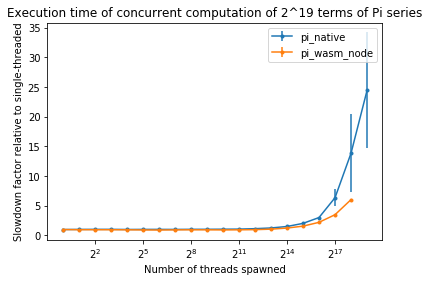

In [2]:
def plot(name):
    data = np.loadtxt(f"results/{name}.csv", delimiter=',')
    threads = data[:,0]
    times = data[:,1:] / 1000000000.0
    mean_times = times.mean(axis=1)
    first_mean = mean_times[0]
    rel_times = times / first_mean
    means = rel_times.mean(axis=1)
    stds = rel_times.std(axis=1)
    plt.errorbar(threads, means, marker='.', yerr=stds, label=name)

plot("pi_native")
plot("pi_wasm_node")

terms=19

plot_path = 'results/plot_rel.eps'
plt.xscale('log', basex=2)
plt.title(f'Execution time of concurrent computation of 2^{terms} terms of Pi series')
plt.xlabel('Number of threads spawned')
plt.ylabel('Slowdown factor relative to single-threaded')
plt.legend()
plt.savefig(plot_path, format='eps')
plt.show()